In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Choose the device you want to plot (1 - 2)
# 1: NVM_1
# 2: SSD

graph = 2

# NVM_1
if graph == 1:
    CAVE = 'data/bfs/nvm1/com-friendster.ungraph_bfs_cache'
    grid = 'data/bfs/nvm1/com-friendster_bfs_cache(grid)'
    mosaic = 'data/bfs/nvm1/com-friendster_bfs_cache (mosaic)'
    output_path = 'plot/bfs/bfs_com-friendster_nvm1'
# SSD
elif graph == 2:
    CAVE = 'data/bfs/ssd/com-friendster.ungraph_bfs_cache'
    CAVE_b = 'data/bfs/ssd/com-friendster.ungraph_bfs_cache_ssd'
    grid = 'data/bfs/ssd/com-friendster_bfs_cache(grid)'
    mosaic = 'data/bfs/ssd/com-friendster_bfs_cache (mosaic)'
    output_path = 'plot/bfs/bfs_com-friendster_ssd'
    
x_label = "Cache size (GB)"



In [9]:
# Load CAVE and CAVE blocked

df = pd.read_csv( CAVE + '.csv')

if graph == 2:
    df1_2 = pd.read_csv( CAVE_b + '.csv')
    df = pd.concat([df, df1_2])
    

# Cleaning data
df['time'] = df['time'].apply(lambda x: x*(10**-6))
df = df.drop(['res'], axis=1)
df = df.drop(['thread'], axis=1)
df = df.groupby(['algo_name', 'cache_mb']).mean().reset_index()

# Creating subset
bfs = df.loc[df['algo_name'] == 'bfs']
bfs_blocked = df.loc[df['algo_name'] == 'bfs_blocked']

# df to array
bfs_arr = bfs['time'].to_numpy()
bfs_blocked_arr = bfs_blocked['time'].to_numpy()

cache = [0.13, 0.25, 0.5, 1, 2, 4, 8, 16]
x = list(range(len(cache)))

cave = bfs_arr
cave_name = "CAVE-BFS"

cave_blocked = bfs_blocked_arr
cave_blocked_name = "CAVE-BFS_blocked"

df

,algo_name,cache_mb,time
0,bfs,128,683.830742
1,bfs,256,645.146222
2,bfs,512,594.465088
3,bfs,1024,510.671091
4,bfs,2048,407.517580
5,bfs,4096,284.545080
6,bfs,8192,145.615306
7,bfs,16384,59.765214
8,bfs_blocked,128,122.711446
9,bfs_blocked,256,121.903631


In [10]:
# Load GridGraph
df2 = pd.read_csv( grid + '.csv')

# Cleaning data
df2['time'] = df2['time'].apply(lambda x: x*(10**-6))
df2 = df2.drop(['res'], axis=1)
df2 = df2.drop(['thread'], axis=1)
df2 = df2.groupby(['algo_name', 'cache_mb']).mean().reset_index()
index = df2[ (df2['cache_mb'] > 32000) ].index
df2.drop(index , inplace=True)

# Creating subset
bfs_grid = df2.loc[df2['algo_name'] == 'bfs']

# df to array
bfs_grid_arr = bfs_grid['time'].to_numpy()

grid = bfs_grid_arr
grid_name = "GridGraph-BFS"

df2

,algo_name,cache_mb,time
0,bfs,128,542.334422
1,bfs,256,490.981748
2,bfs,512,484.049604
3,bfs,1024,487.408445
4,bfs,2048,485.184524
5,bfs,4096,481.865453
6,bfs,8192,477.355982
7,bfs,16384,449.274729


In [11]:
# Load Mosaic
df3 = pd.read_csv( mosaic + '.csv')

# Cleaning data
df3['time'] = df3['time'].apply(lambda x: x*(10**-6))
df3 = df3.drop(['thread'], axis=1)
df3 = df3.drop(['init_time'], axis=1)
df3 = df3.drop(['res'], axis=1)
df3 = df3.drop(['system'], axis=1)

df3 = df3.groupby(['algo_name', 'cache_mb']).mean().reset_index()
index = df3[ (df3['cache_mb'] > 32000) ].index
df3.drop(index , inplace=True)

# Creating subset
bfs_mos = df3.loc[df3['algo_name'] == 'bfs']

# df to array
bfs_mos_arr = bfs_mos['time'].to_numpy()

mos = bfs_mos_arr
mos_name = "Mosaic-BFS"

df3

,algo_name,cache_mb,time
0,bfs,128,471.236517
1,bfs,256,474.048648
2,bfs,512,478.250730
3,bfs,1024,479.426471
4,bfs,2048,482.066794
5,bfs,4096,481.319965
6,bfs,8192,477.701098
7,bfs,16384,473.804672


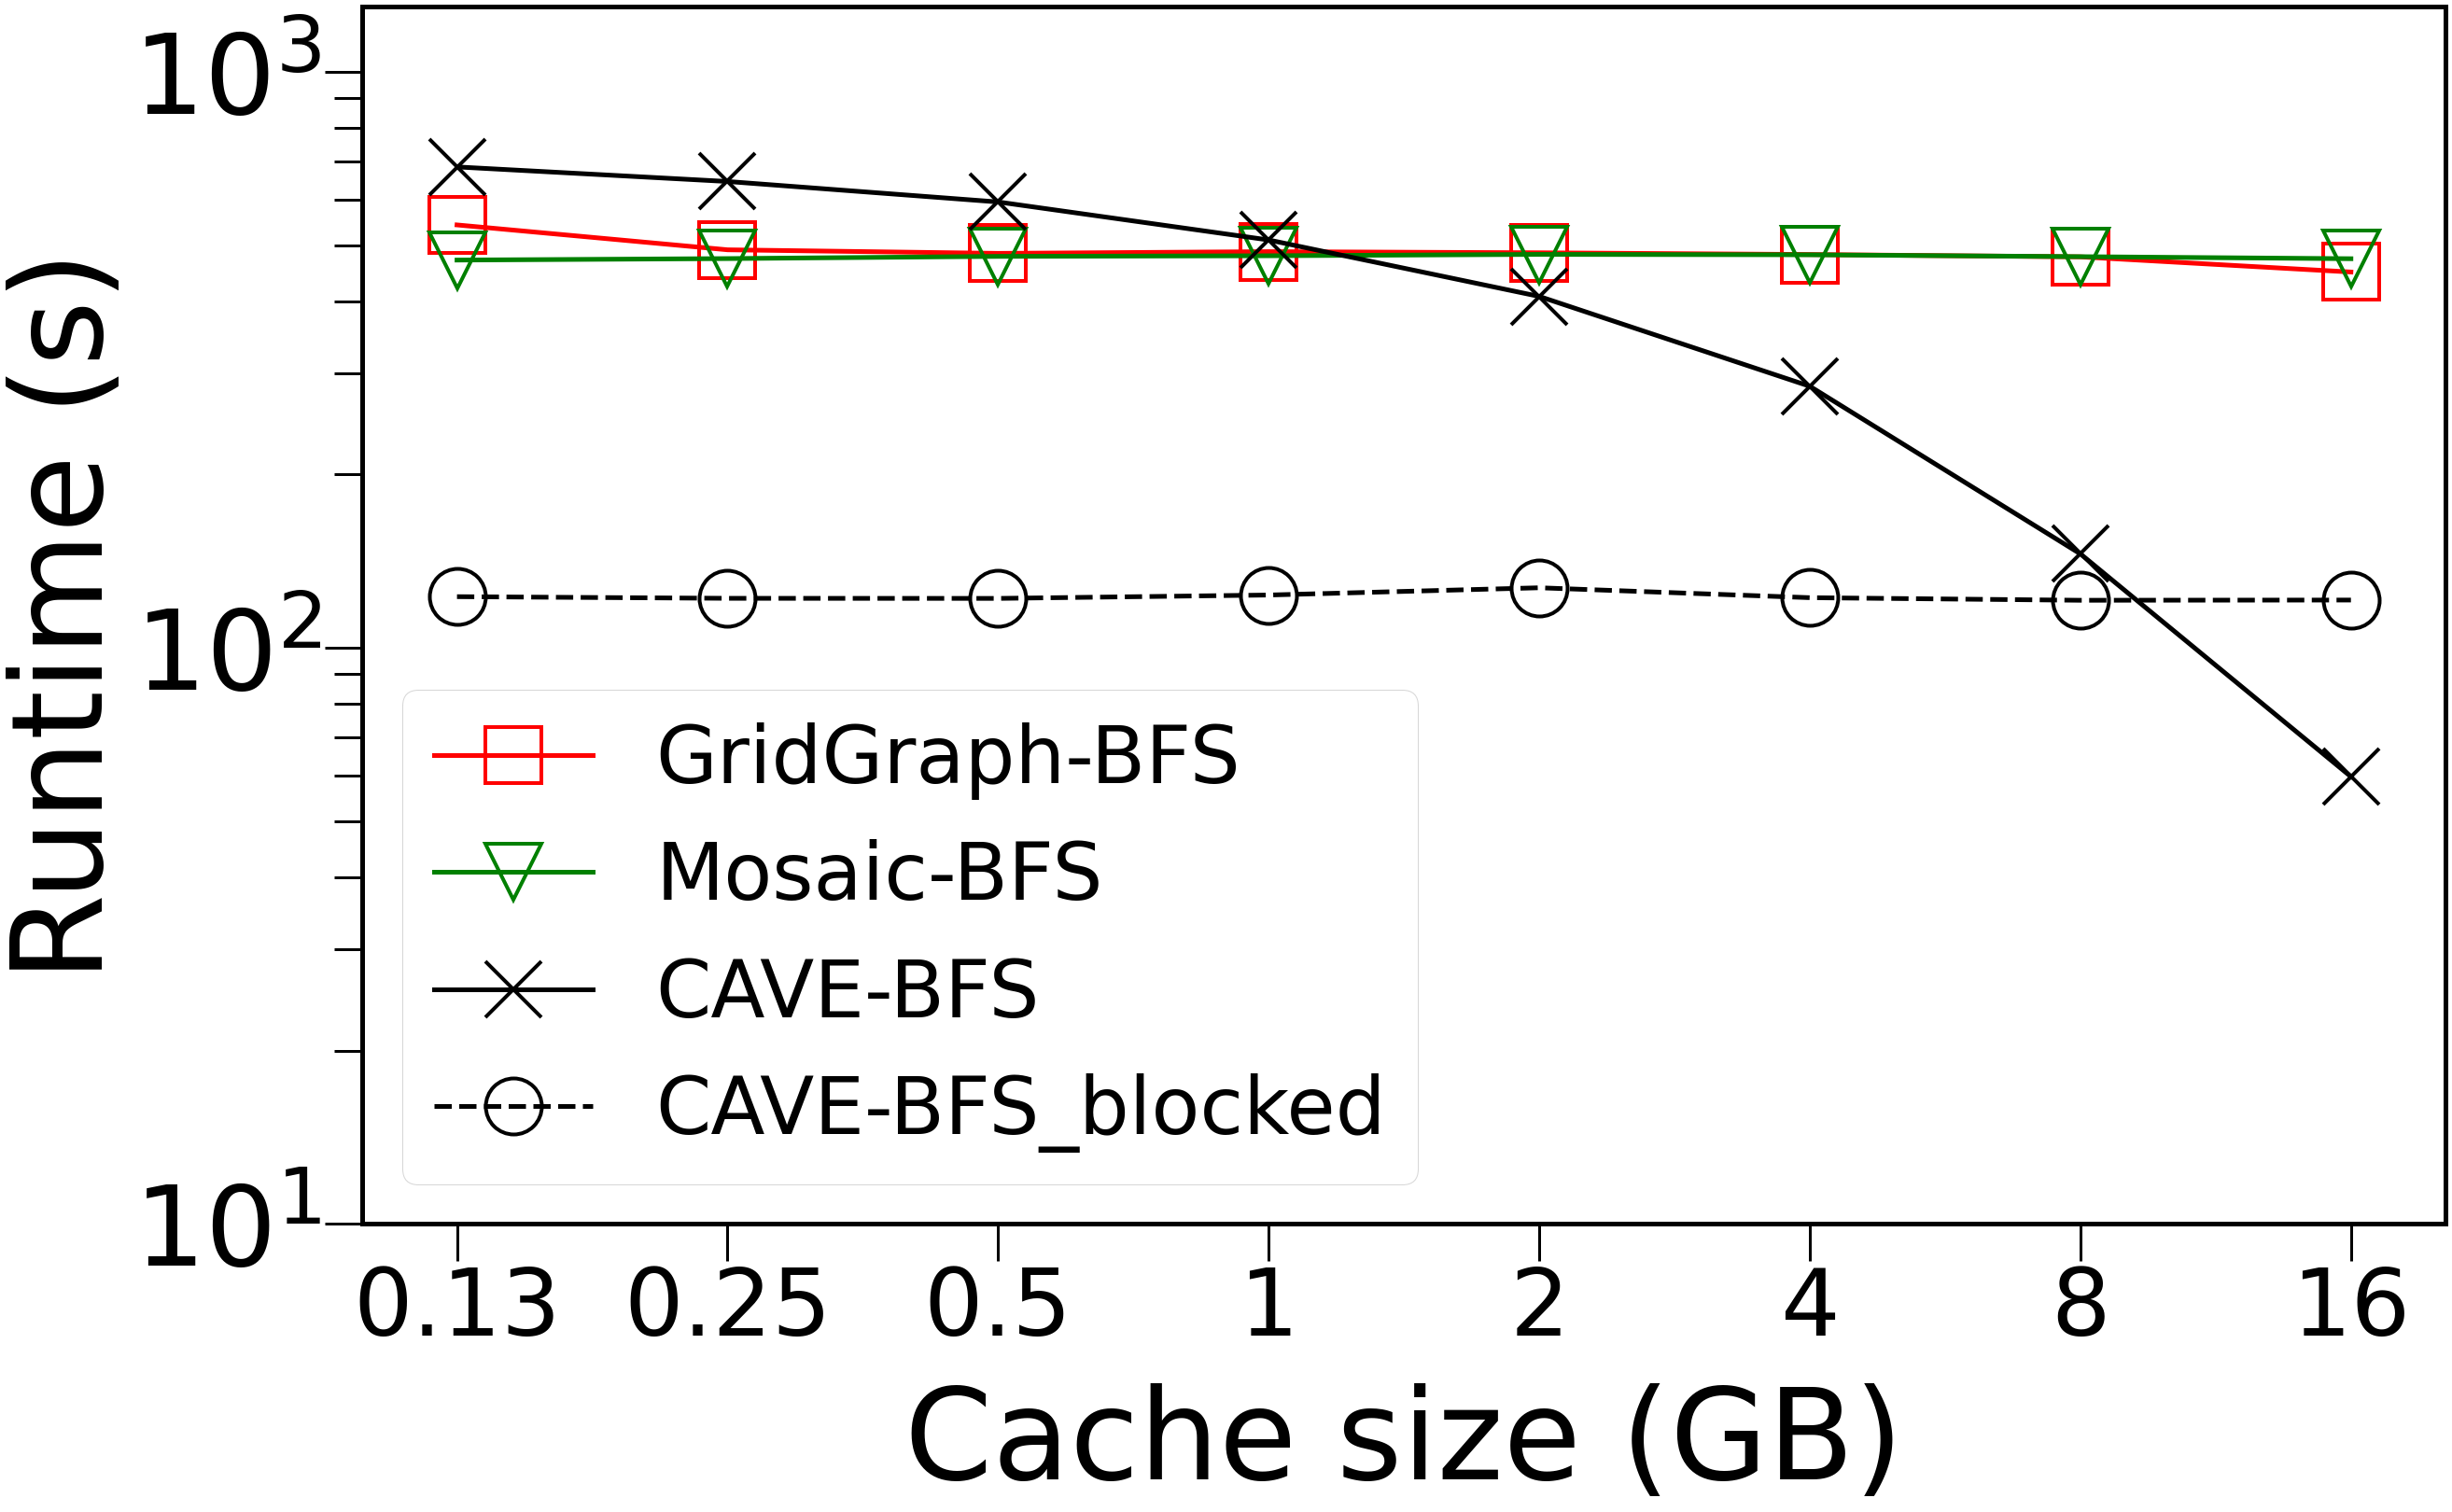

In [12]:
# Graph Settings
fig = plt.figure(figsize=(40,24))

# plt.title(title,fontsize=52)


y_label = "Runtime (s)"
    
plt.xlabel(x_label,fontsize=135, labelpad=30)
plt.ylabel(y_label,fontsize=135)

plt.rc('xtick', labelsize = 100)    # fontsize of the tick labels
plt.rc('ytick', labelsize = 120)    # fontsize of the tick labels
plt.rc('legend', fontsize = 85)    # legend fontsize
plt.rc('lines', linewidth = 5)     # line width
plt.rc('lines', markersize = 60)   # marker size
plt.rc('lines', markeredgewidth = 4)   # marker edge width
plt.rc('lines', markerfacecolor = 'none') 

plt.rcParams["axes.linewidth"] = 5    #Border width

plt.xticks(x, cache)
plt.yscale('log')
plt.tick_params(direction='out', length=40, width=3)    # Change tick size
plt.tick_params(direction='out', which='minor',length=30, width=3)


# Plot lines
plt.plot(x, grid, marker='s', color='red', label=grid_name)
plt.plot(x, mos, marker='v', color='green', label=mos_name)
plt.plot(x, cave, marker='x', color='black', label=cave_name)
plt.plot(x, cave_blocked, marker='o', color='black', linestyle = '--', label=cave_blocked_name)


if graph == 2:
    plt.ylim(top=1300)
    plt.ylim(bottom=10)
    plt.legend(loc = 'lower left')
elif graph == 1:
    plt.ylim(top=1300)
    plt.ylim(bottom=10)
    plt.legend(loc = 'upper left')



# plt.ylim(bottom=0)
# plt.show()

plt.savefig(output_path +'.pdf', bbox_inches = "tight")

# If output front is small, rerun this cell